In [1]:
import numpy as np
import array as arr
import time
import warnings
import matplotlib.pyplot as plt

#square array of random int  
n = 3
a = np.random.randint(100, size=(3, 3))
#vector of random int
b = np.random.randint(100, size=(3))

#solving a system of linear equations using the numpy package
res = np.linalg.solve(a,b)
print(res)

#cramer's rule
det_a = np.linalg.det(a)
res2 = []
for i in range(n):
    matrix_copy = a.copy()
    matrix_copy[:, i] = b[:]
    res2.append(np.linalg.det(matrix_copy)/det_a)
    
print(res2)


[ 0.02641936  1.54582734 -0.97036758]
[0.026419363201432882, 1.5458273432160468, -0.9703675771644948]


/opt/conda/lib/python3.7/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


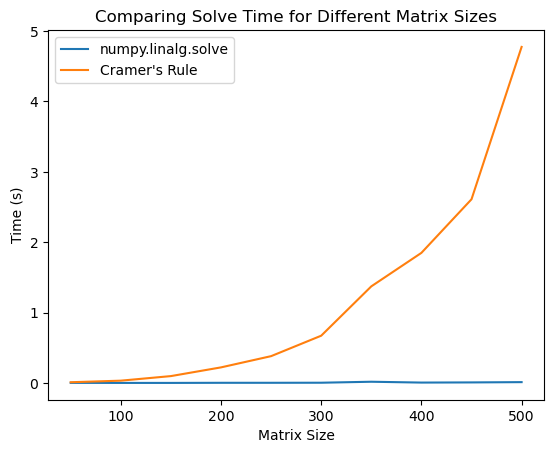

In [2]:
time_linalg_solve = []
time_cram = []

n = 50
max = 500
step = 50
matrix_sizes = []

while n <= max:
    matrix_sizes.append(n)
    a = np.random.randint(100, size=(n, n))
    b = np.random.randint(100, size=(n))
    
    start = time.time()
    res = np.linalg.solve(a,b)
    finish = time.time()
    
    time_linalg_solve.append(finish - start)
    
    start = time.time()
    for i in range(n):
        matrix_copy = a.copy()
        matrix_copy[:, i] = b[:]
        res2.append(np.linalg.det(matrix_copy)/det_a)
    finish = time.time()
    
    time_cram.append(finish - start)
    n += step
    
plt.plot(matrix_sizes, time_linalg_solve, label='numpy.linalg.solve')
plt.plot(matrix_sizes, time_cram, label='Cramer\'s Rule')
plt.legend()
plt.xlabel('Matrix Size')
plt.ylabel('Time (s)')
plt.title('Comparing Solve Time for Different Matrix Sizes')
plt.show()
